In [69]:
import json
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.preprocessing import sequence
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [103]:
def getNonSeqData(data):
    output = []

    output.append(data['FurLength'])
    output.append(data['Color1'])
    
#     output.append(0 if data['Fee'] == 0 else 1)
    output.append(data['Fee'])
    
    output.append(data['Vaccinated'])
    output.append(data['Dewormed'])
    output.append(data['Sterilized'])
    output.append(data['MaturitySize'])
    
#     output.append(1 if data['Quantity'] == 1 else 2)
#     output.append(int(data['PhotoAmt']//5))
    output.append(data['Quantity'])
    output.append(data['PhotoAmt'])
    
    output.append(data['Gender'])
    
#     output.append(data['Age']//12)
    output.append(data['Age'])

    output.append(0 if data['Breed2'] == 0 else 1)
    
    output.append

    return output

In [104]:
# load dataset
filename = 'text_and_label_all/json_bow.json'

X = []
y = []


with open(filename) as json_file:
    data = json.load(json_file)
    
    for key, value in data.items():
        X.append(value["bow"] + getNonSeqData(value))
        y.append(value["label"])

X = np.array(X)
y = np.array(y)
        
y = to_categorical(y, num_classes=5)
        
print(X[0])
print(y[0])

[1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(11447, 512) (11447, 5)
(2862, 512) (2862, 5)


In [120]:
vocab_size = 512

model = Sequential()
model.add(Dense(200, input_shape=(vocab_size,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 200)               102600    
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 5)                 1005      
Total params: 103,605
Trainable params: 103,605
Non-trainable params: 0
_________________________________________________________________
None


In [123]:
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 11447 samples, validate on 2862 samples
Epoch 1/5
11447/11447 [==============================] - 1s 120us/step - loss: 1.2650 - acc: 0.4516 - val_loss: 1.3743 - val_acc: 0.3816
Epoch 2/5
11447/11447 [==============================] - 1s 108us/step - loss: 1.2256 - acc: 0.4774 - val_loss: 1.3844 - val_acc: 0.3836
Epoch 3/5
11447/11447 [==============================] - 1s 111us/step - loss: 1.1874 - acc: 0.4938 - val_loss: 1.4041 - val_acc: 0.3913
Epoch 4/5
11447/11447 [==============================] - 1s 108us/step - loss: 1.1633 - acc: 0.5069 - val_loss: 1.4226 - val_acc: 0.3854
Epoch 5/5
11447/11447 [==============================] - 1s 109us/step - loss: 1.1216 - acc: 0.5326 - val_loss: 1.4251 - val_acc: 0.3966
Accuracy: 39.66%


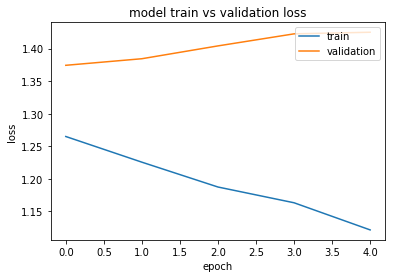

In [124]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()